Estudio en profundidad de las características que caracterizan a los temas más escuchados estos últimos años ( TOPLIST) 
Entrenaremos un dataset con estas para más adelante aplicarlo al dataset general y encontrar " perlas" que por características deberían haber sido populares pero no lo fueron, quizás por falta de MKTG, etc..

In [276]:
# importamos bibliotecas 

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score




    Cargamos este dataset con 32000 canciones y sus características sónicas( Tono, escala, y coef.sintéticos ) así como su popularidad.
    Seleccionaremos las canciones más populares ( track_popularity > 70  )

In [277]:
# cargamos Dataset    https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs


data = pd.read_csv('spotify_songs.csv')

df = pd.DataFrame(data)

# guardamos una copia del DF original
df_original = df.copy()

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [279]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Destacamos, pues es relevante para nuestro estudio:

que la media de Track_popularity es 42\
que el 75% de las muestras tienen una track_popularity inferior a 62

In [280]:
# Veamos si hay duplicados 

df.shape

(32833, 23)

In [281]:
#Drop duplicates y new_shape

df['track_id'] = df['track_id'].astype('category')
df.drop_duplicates(subset=['track_id']). reset_index(drop = True)
df.shape 

(32833, 23)

Confirmamos que no hay duplicados, por lo menos en cuanto a track_id

In [282]:
#df.convert_dtypes()

df.convert_dtypes()

# Nos quedamos solo con Year para la columna 'track_album_release_date'

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df['track_album_release_year'] = df['track_album_release_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  category      
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  32833 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  object        
 8   playlist_id               32833 non-null  object        
 9   playlist_genre            32833 non-null  object        
 10  playlist_subgenre         32833 non-null  object        
 11  danceability              32833 non-null  float64       
 12  energy            

No hay valores nulos, nos evitamos : df.isnull().sum()\
Para las variables categóricas que finalmente conservemos aplicaremos Label Encoder


 Vamos a eliminar las columnas innecesarias para este estudio: track_id (0), track_name (1), track_artist (2), track_album_id(4),track_album_name (5), track_album_release_date (6)  playlist_name (7),playlist_id (8), playlist_genre (9) playlist_subgenre (10) ,duration_ms (22), track_album_release_year  (23)

In [283]:
df = df.drop(df.columns[[0,1,2,4,5,6,7,8,9,10,12,22,23]], axis= 1 )
df = df.round(decimals = 2)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32833 non-null  int64  
 1   danceability      32833 non-null  float64
 2   key               32833 non-null  int64  
 3   loudness          32833 non-null  float64
 4   mode              32833 non-null  int64  
 5   speechiness       32833 non-null  float64
 6   acousticness      32833 non-null  float64
 7   instrumentalness  32833 non-null  float64
 8   liveness          32833 non-null  float64
 9   valence           32833 non-null  float64
 10  tempo             32833 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 2.8 MB


# EDA

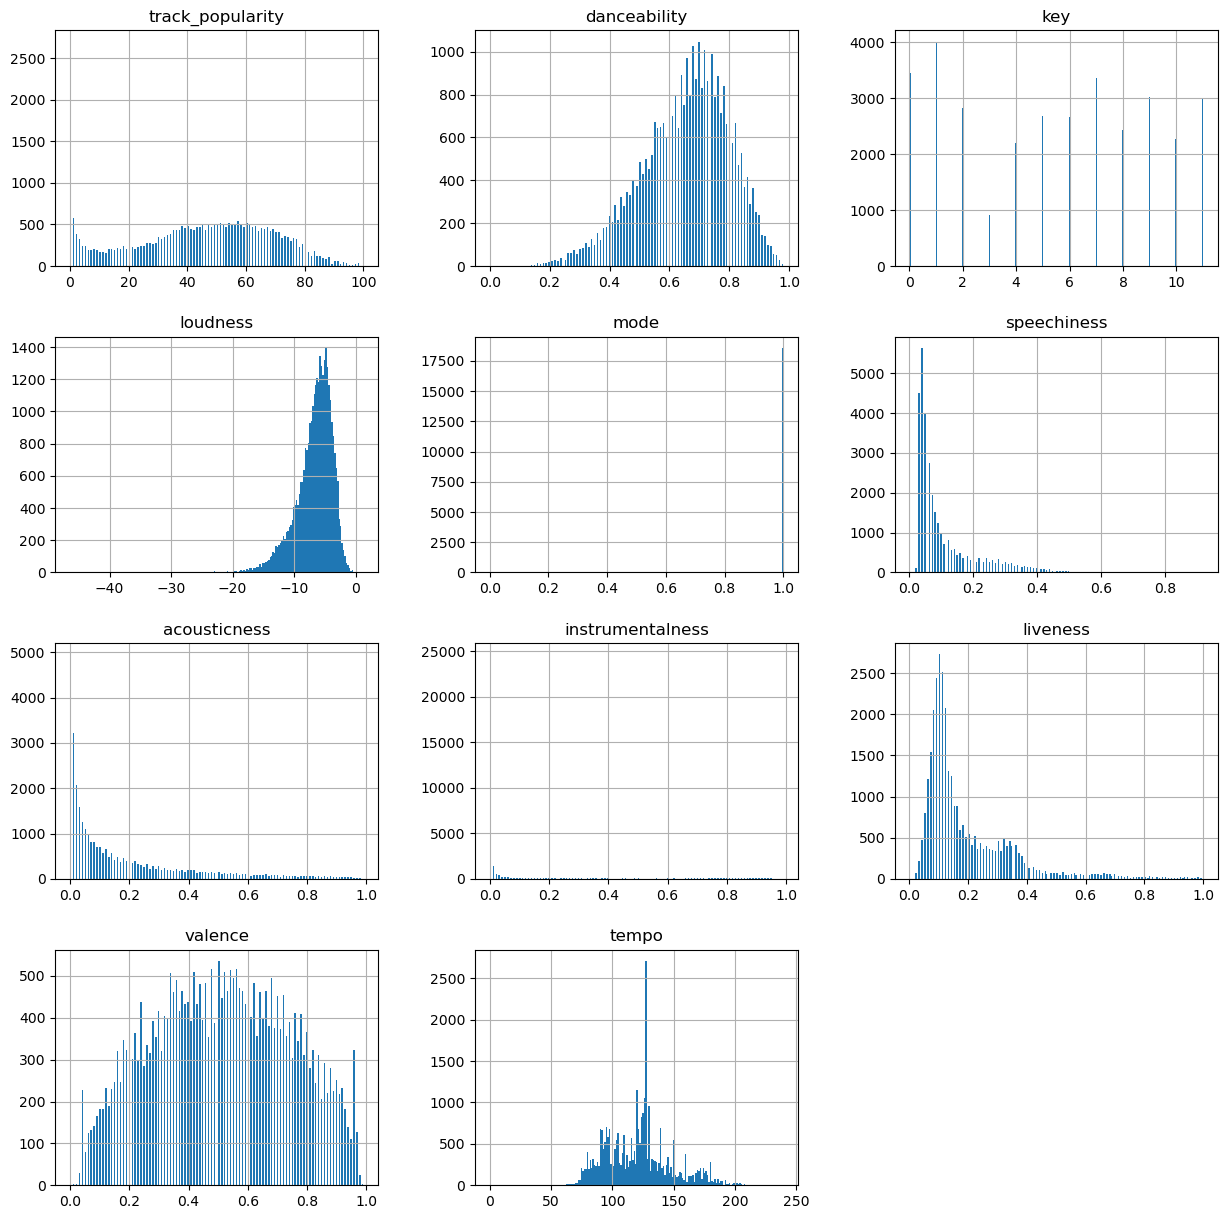

In [285]:
df.hist(figsize = (15,15), bins = 200)
plt.show()

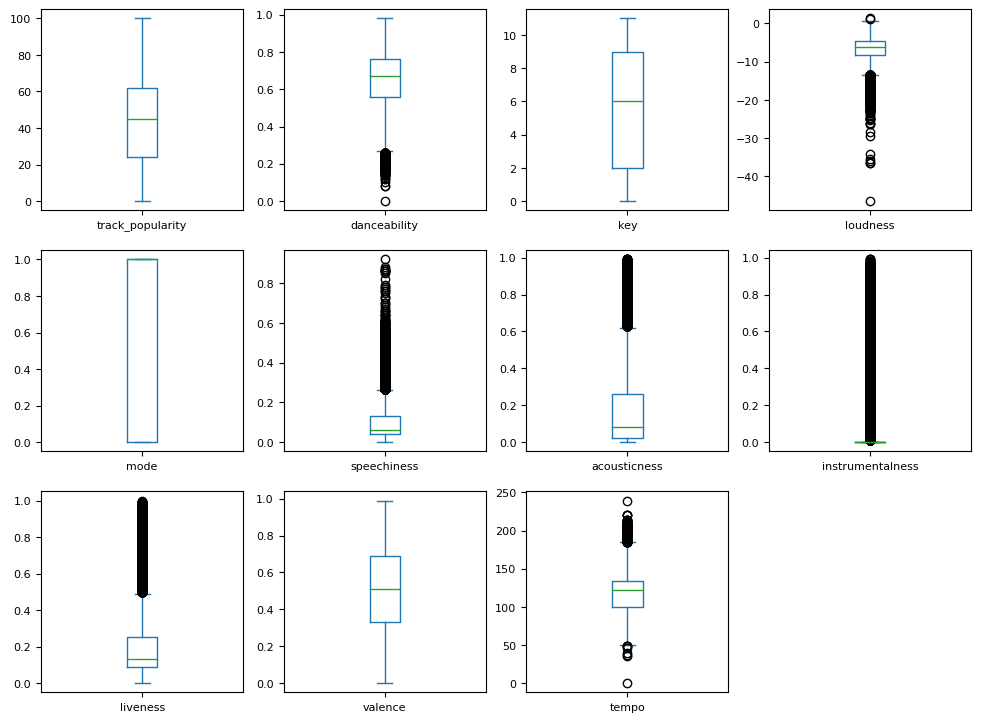

In [286]:
# Veamos si existen outliers visualmente

df.plot(subplots=True, kind = 'box' ,  layout=(4,4), fontsize=8, figsize=(12,12));

Vemos outliers para gran parte de las características. Aplicaremos RobustScaler cuando normalizemos el dataset.



In [287]:
# Veamos si las variables tienen una distribución normal : 

# TEST SHAPIRO

from scipy.stats import shapiro

columns_numericas = df.select_dtypes(include=['int64', 'float64'])

 #Realizamos el test de Shapiro para cada columna numérica:
    
for column in columns_numericas:
    stat, p = shapiro(df[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')
    
    

Columna: track_popularity, Estadística: 0.957, p-valor: 0.000
Columna: danceability, Estadística: 0.982, p-valor: 0.000
Columna: key, Estadística: 0.925, p-valor: 0.000
Columna: loudness, Estadística: 0.924, p-valor: 0.000
Columna: mode, Estadística: 0.631, p-valor: 0.000
Columna: speechiness, Estadística: 0.741, p-valor: 0.000
Columna: acousticness, Estadística: 0.778, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.427, p-valor: 0.000
Columna: liveness, Estadística: 0.774, p-valor: 0.000
Columna: valence, Estadística: 0.980, p-valor: 0.000
Columna: tempo, Estadística: 0.973, p-valor: 0.000


Shapiro Test nos confirma que ninguna de estas características sigue una distribución normal ( rechazamos hip.nula pues que el p-value es menor a 0.05) ) . Confirma que podremos aplicar Robust Scaler más adelante.






Añadiremos una Columna ['control'] para clasificar las canciones segun su popularidad.
Nos permitirá visualizar mediante ' Hue' las diferencias entre características para canciones populares y canciones no-populares . Será nuestra variable target a la hora de "entrenar" el modelo.
Crearemos dos subsets antagónicos :

     Canciones Populares( Top : track_popularity > 70 : track_popularity > 70 )  y características sónicas :[ Control] = 1
     Canciones Looser   (bottom track_popularity < 70 ) y características sónicas : [ Control] = 0


In [288]:
df['control'] = df['track_popularity'].apply(lambda x: 1 if x > 70 else  0)

df

,track_popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,control
0,66,0.75,6,-2.63,1,0.06,0.10,0.00,0.07,0.52,122.04,0
1,67,0.73,11,-4.97,1,0.04,0.07,0.00,0.36,0.69,99.97,0
2,70,0.68,1,-3.43,0,0.07,0.08,0.00,0.11,0.61,124.01,0
3,60,0.72,7,-3.78,1,0.10,0.03,0.00,0.20,0.28,121.96,0
4,69,0.65,1,-4.67,1,0.04,0.08,0.00,0.08,0.72,123.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.43,2,-1.81,1,0.09,0.08,0.00,0.07,0.21,128.17,0
32829,20,0.52,0,-4.46,1,0.04,0.00,0.00,0.38,0.40,128.04,0
32830,14,0.53,6,-4.90,0,0.05,0.11,0.00,0.15,0.44,127.99,0
32831,15,0.63,2,-3.36,1,0.11,0.01,0.13,0.34,0.31,128.01,0


Pequeños gráficos pairplot vs track_popularity

Visualizaremos diferencias entre TOP y BOTTOM mediante Hue (df[control]). 

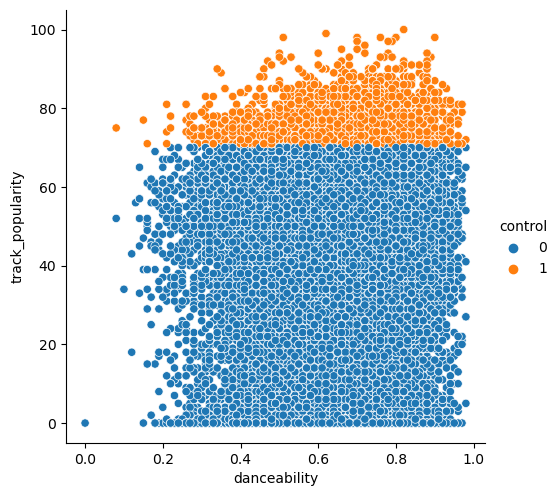

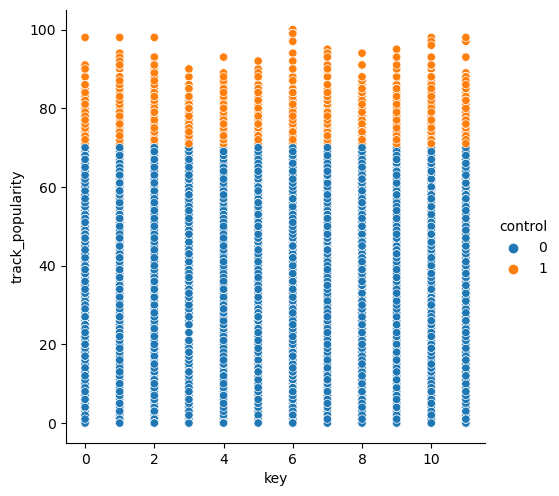

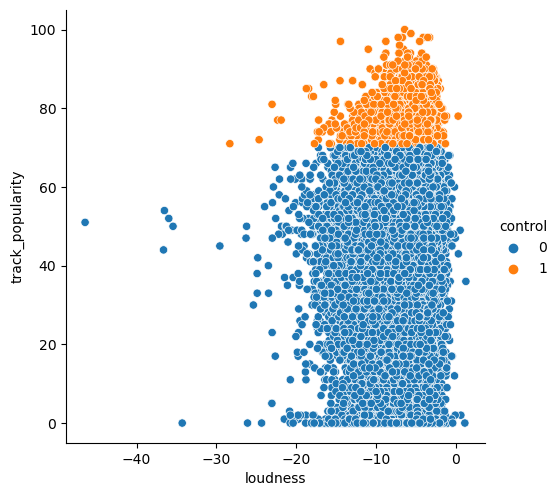

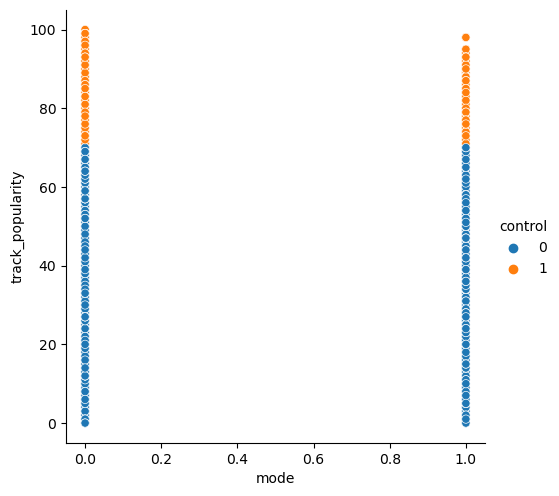

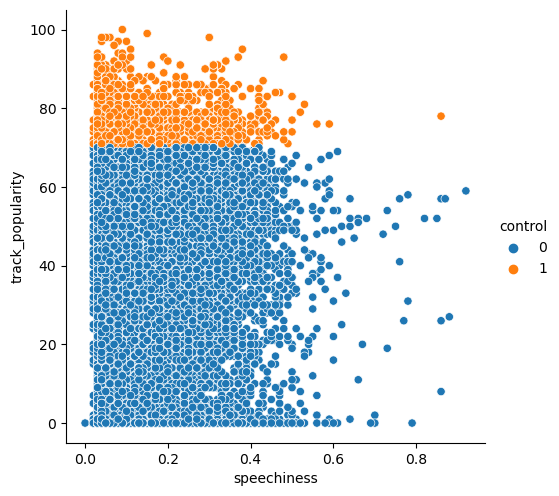

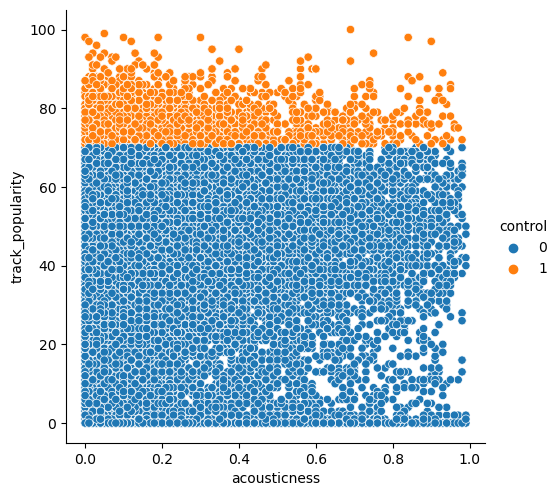

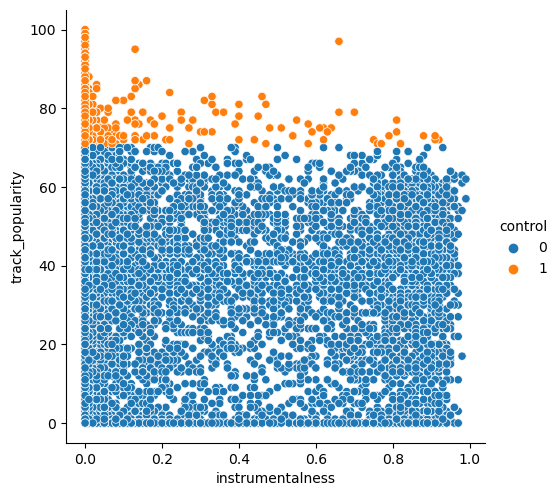

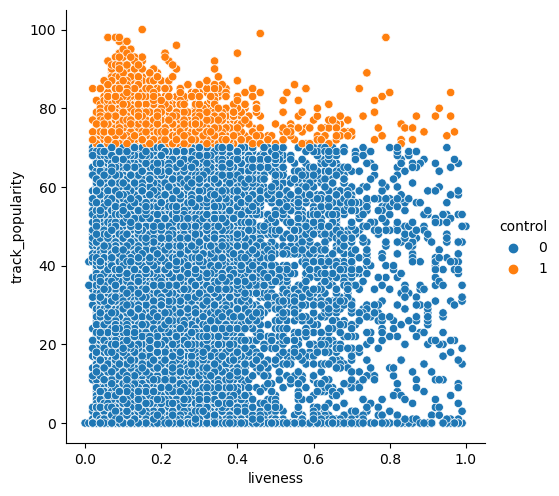

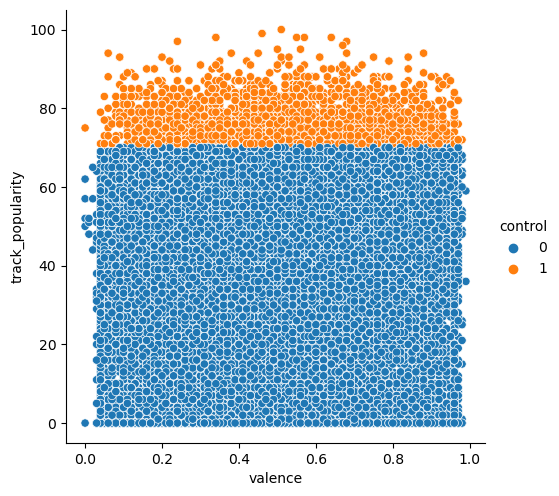

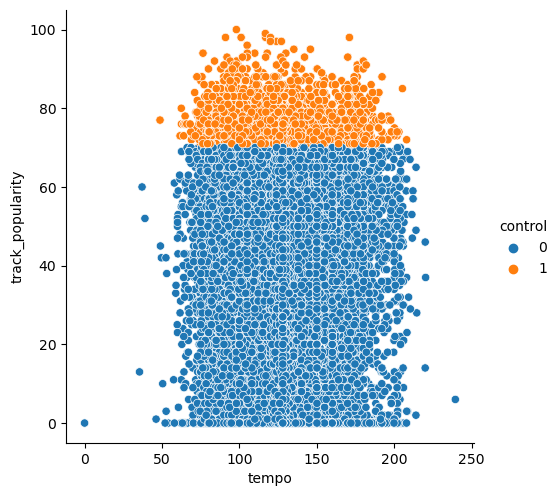

In [289]:
columnas = ['danceability','key','loudness','speechiness', 'acousticness','instrumentalness', 'liveness','valence','tempo', 'playlist_genre_encoded']


# Creamos subplots para cada feature


fig.suptitle('Características por popularidad', fontsize=16)


for i in range(1,(len(df.columns)-1)) :                       # evitamos la posición [0] porque es 'track_popularity' 
                                                                  #  [1] porque es Genre ( categórica)
                                                                  # [16] porque es control (  Hue )
            
    sns.pairplot(df,  hue = 'control', x_vars=df.columns[i], y_vars=['track_popularity'],height=5)
  
   

No vemos grandes diferencias en cuanto a distribucion por features vs.track_popularity
..será difícil llegar al objetivo de classificar las canciones TOP...
Sí vemos que el subset TOP es mucho menor que el subset BOTTOM.



Veamos si existen diferencias en cuanto a correlaciones entre variables para ambos grupos ( TOP y BOTTOM )

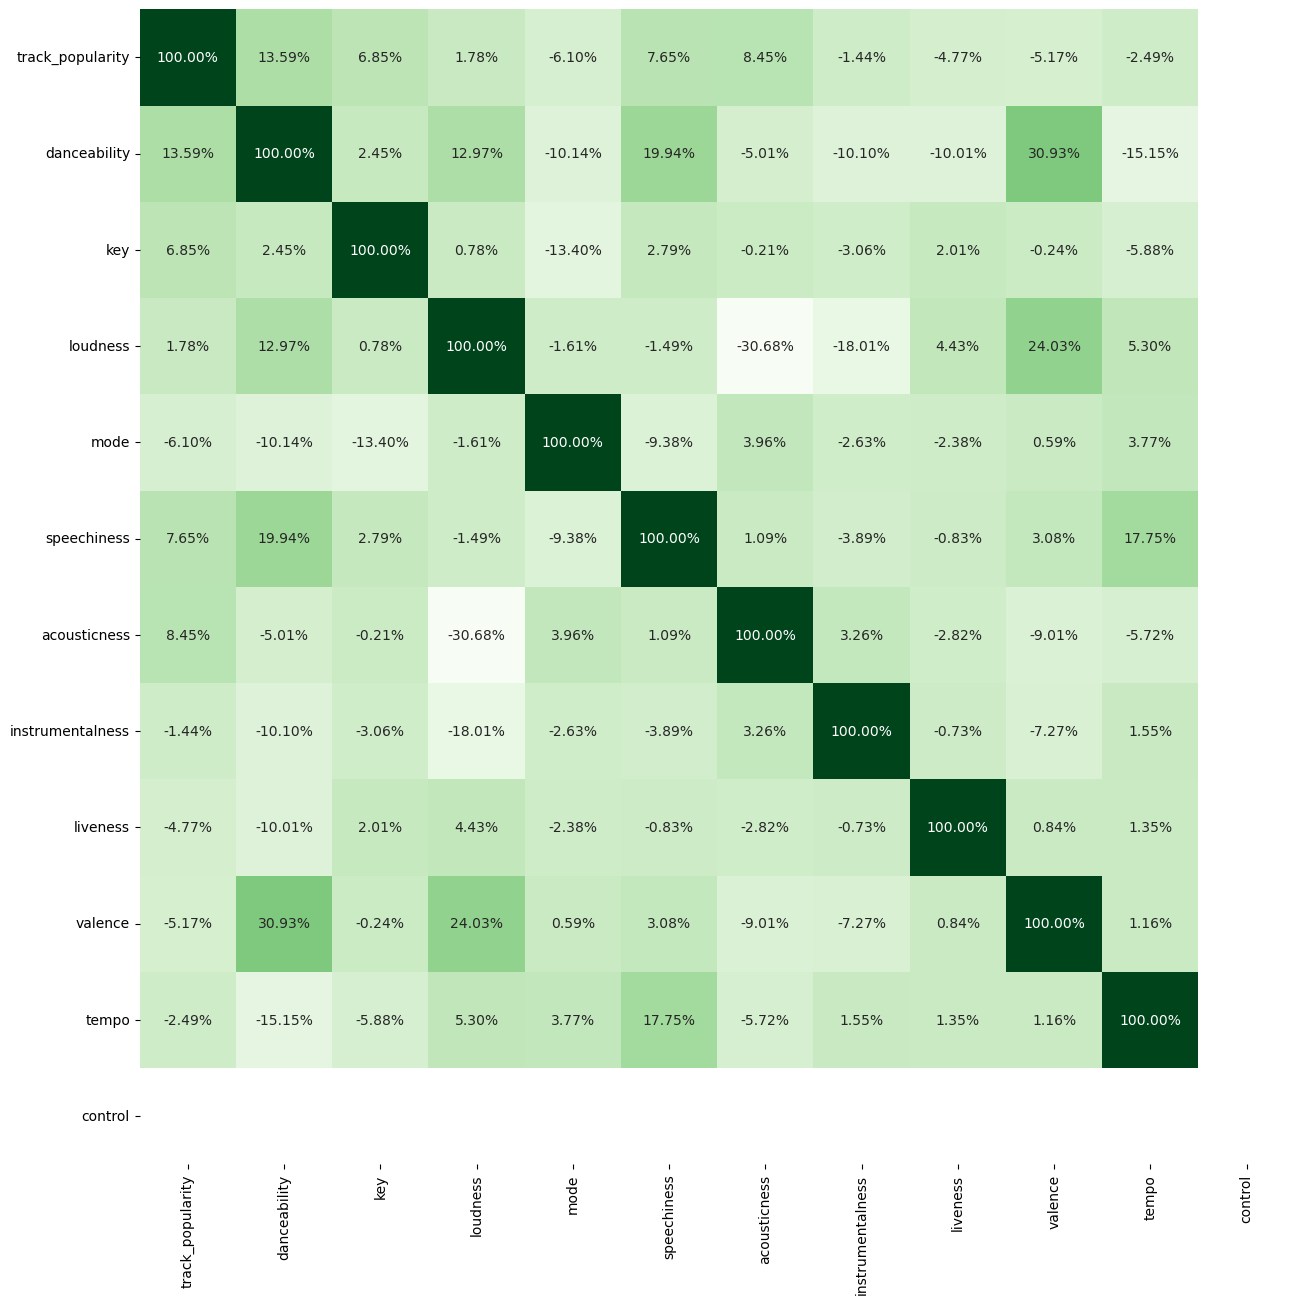

In [290]:
# Correlaciones entre features de Canciones TOP
df_Canciones_top
 =  df.query('control == 1')
corr_Top = df_Canciones_top.corr()


# Diseño 
plt.figure(figsize=(15,15))
plt.tight_layout


heatmap =sns.heatmap(corr_Top, cbar = False, square= True, fmt='.2%', annot=True, cmap='Greens')

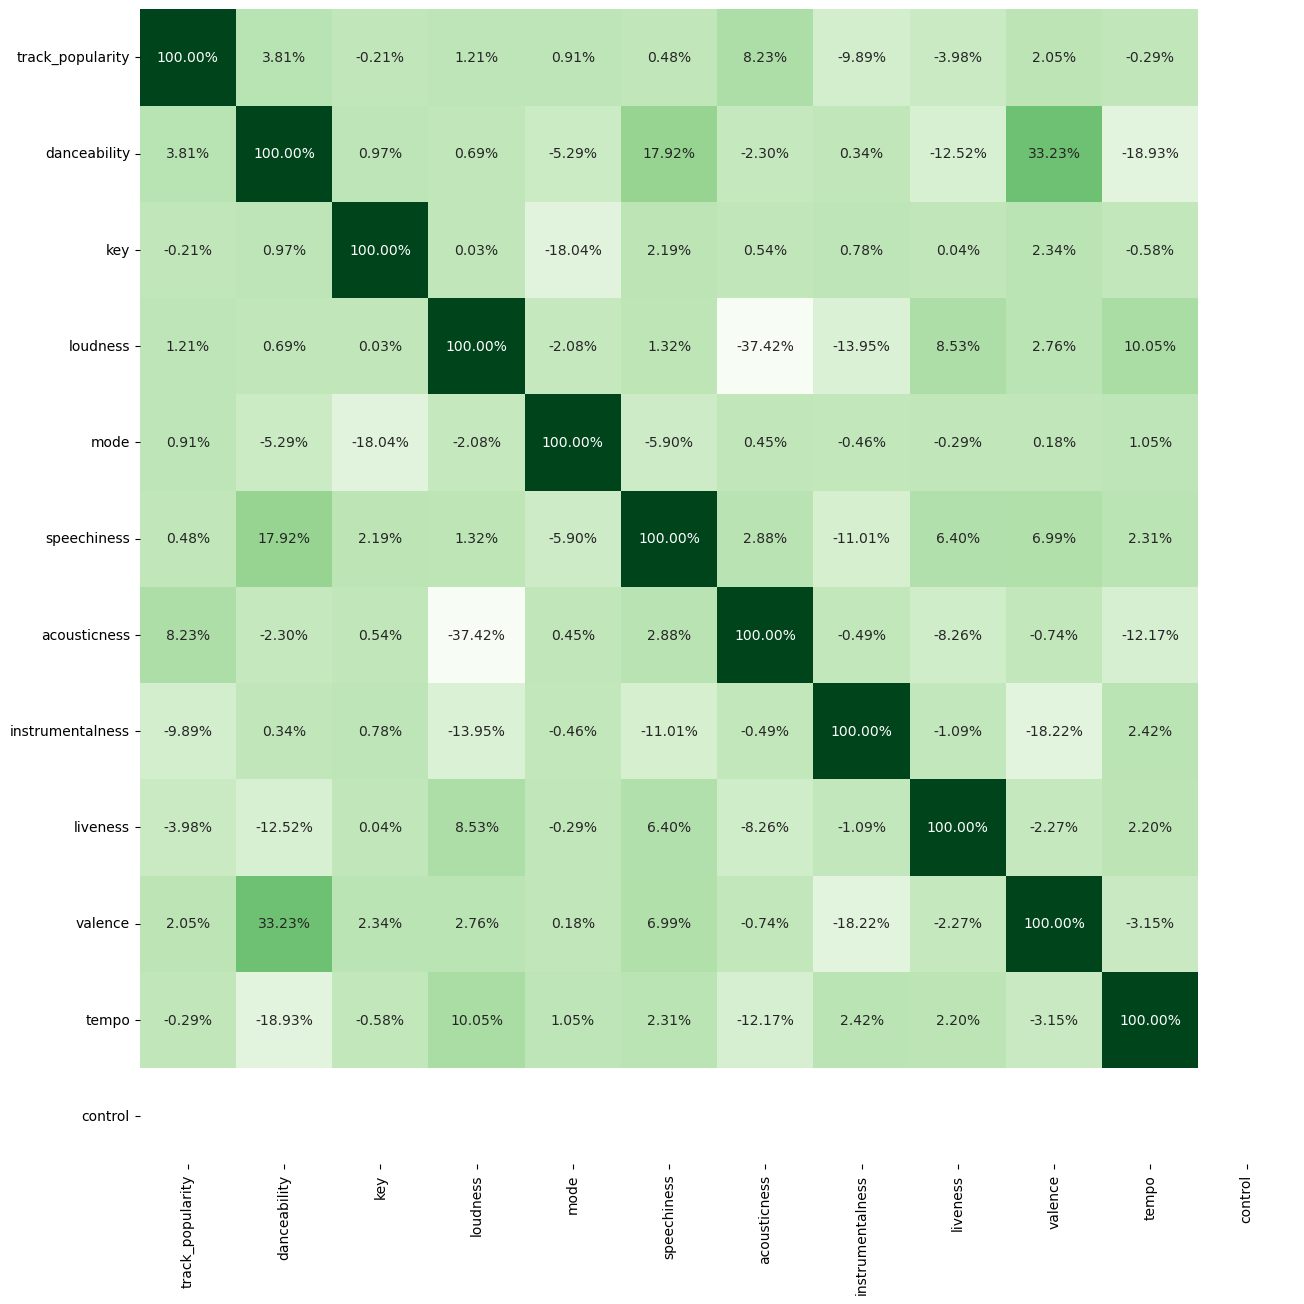

In [291]:
# Correlaciones entre features de Canciones BOTTOM 

df_Canciones_bottom =  df.query('control == 0')
corr_bottom = df_Canciones_bottom.corr()


# Diseño 
plt.figure(figsize=(15,15))
plt.tight_layout


heatmap =sns.heatmap(corr_bottom, cbar = False, square= True, fmt='.2%', annot=True, cmap='Greens')

De hecho solo nos interesa comparar correlaciones entre track_popularity y las diferentes features para ambos grupos de Control ( TOP y BOTTOM)  
Crearemos un DataFrame donde reflejar las diferencias de estos dos grupos en cuanto a correlaciones por feature.    
    

In [292]:
data2 = []
for i in range(len(corr_Top.columns)-2):
    column_name = corr_Top.columns[i]
    corr_top_value = corr_Top.iloc[0, i]
    corr_bottom_value = corr_bottom.iloc[0, i]
    data2.append([column_name, corr_top_value, corr_bottom_value])

df_combined = pd.DataFrame(data2, columns=['Column_Name', 'Corr_Top_Value', 'Corr_Bottom_Value'])
print(df_combined)

        Column_Name  Corr_Top_Value  Corr_Bottom_Value
0  track_popularity        1.000000           1.000000
1      danceability        0.135887           0.038067
2               key        0.068543          -0.002057
3          loudness        0.017846           0.012089
4              mode       -0.060959           0.009095
5       speechiness        0.076450           0.004817
6      acousticness        0.084489           0.082260
7  instrumentalness       -0.014434          -0.098938
8          liveness       -0.047687          -0.039814
9           valence       -0.051656           0.020504


No vemos grandes diferencias en cuanto a correlaciones x feature y grupo de control. Si acaso : 

    Danceability : 0.13 TOP vs 0.03  BOTTOM ...las canciones TOP suelen ser ligeramente más bailables.
    
    Speechness   : 0.07 TOP vs 0.004 BOTTOM ...las canciones TOP suelen incluir más partes "habladas", mas "Lyrics". 
    
    Instrumentalness : -0.014 TOP vs - 0.09 BOTTOM .. las canciones TOP son menos instrumentales que las canciones BOTTOM.                                                Confirma en cierta forma la importancia de las lyrics en cuanto a la                                                        popularidad de una canción.
    
    Valence : -0.051 TOP vs 0.02 BOTTOM     ...las canciones TOP guardan una mínima correlación negativa con Valence y las                                                canciones BOTTOM guardan una mínima correlación positiva con VALENCE.
                                               las canciones TOP suelen ser más alegres que las canciones BOTTOM.
    

Con estos dos grupos de control "entrenaremos" al modelo .
Definimos 'X' e 'y' (target).
Hacemos la división train test . Aplicamos un escalado previo

In [293]:
# Asignamos la variable target 
X = df.drop(['control','track_popularity'], axis=1) # sacamos track_popularity una vez ya tenemos la columna control, no afectase al entreno( colinealidad con Control)
y = df['control']

In [294]:
y.value_counts()

0    28409
1     4424
Name: control, dtype: int64

Vemos que el subset TOP (1) es mucho menor que el subset BOTTOM (0).
Intentaremos utilizar técnicas de Over-sampling/ Undersampling para paliar posibles sesgos.
Utilizaremos SMOTE (Synthetic Minority Over-sampling Technique)

In [295]:
# Train/ test Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [296]:
# importamos las librerias para Oversamppling ( Smote) 

from imblearn.over_sampling import SMOTE

# Implement SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [297]:
y_train_smote.value_counts()

0    22709
1    22709
Name: control, dtype: int64

Vemos como las clases se han igualado.

In [298]:
# Inicializar el RobustScaler
scaler = RobustScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled =scaler.fit_transform(X_train_smote)

# Solo transformar los datos de prueba (no volver a ajustar para evitar data leakage)
X_test_scaled = scaler.transform(X_test)

 Finalmente no utilizamos Lazypredict porque es lentíssimo ( altíssimo coste computacional)

In [299]:
# KneighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.get_params()



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [300]:
#  Parametros sobre los que vamos a iterar CV

param_grid = {'algorithm': ['auto'],
'leaf_size': [100,30,20,10],
    'metric': ['minkowski'],
        'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100,200,500],
            'p': [2,3,4],
                'weights': ['uniform']}

In [301]:
# RandomizedSearchCV y fit()del modelo KNN

grid_search1 = RandomizedSearchCV(knn, param_grid, n_iter=20, cv=5, verbose = 2, scoring='accuracy', n_jobs=-1)


        
grid_search1.fit(X_train_scaled, y_train_smote)
grid_search1.best_params_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 1,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

In [302]:
best_model_knn = grid_search1.best_estimator_


In [303]:
y_pred_knn = best_model_knn.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5700
           1       0.38      0.76      0.51       867

    accuracy                           0.80      6567
   macro avg       0.67      0.78      0.69      6567
weighted avg       0.88      0.80      0.83      6567



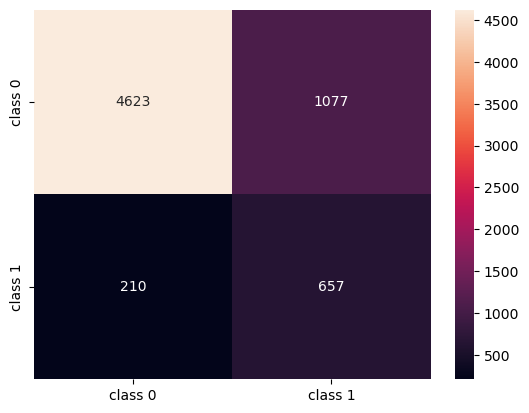

In [304]:
from sklearn.metrics import classification_report, confusion_matrix


# Adding classes names for better interpretation
classes_names = ['class 0','class 1']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_knn))

Ajuste horrible ( f1_score = 51%  para canciones TOP, class1 ), objeto del estudio..cual es la formula mágica ? ).
Ajusta bastante bien a la hora de predecir canciones que no van a ser populares. ( Class 0 ). 
En lugar de " Hit predictor" podríamos llamarlo" Crash predictor"..jaja


Busquemos el K óptimo a ver si ajusta mejor

In [305]:
# Calculamos  f1 score para K values entre  1 y 20

from sklearn.metrics import f1_score

f1s = []

for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train_scaled, y_train_smote)
    pred_i = knn1.predict(X_test_scaled)
    #  average='weighted' para calcular una media ponderada de las 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

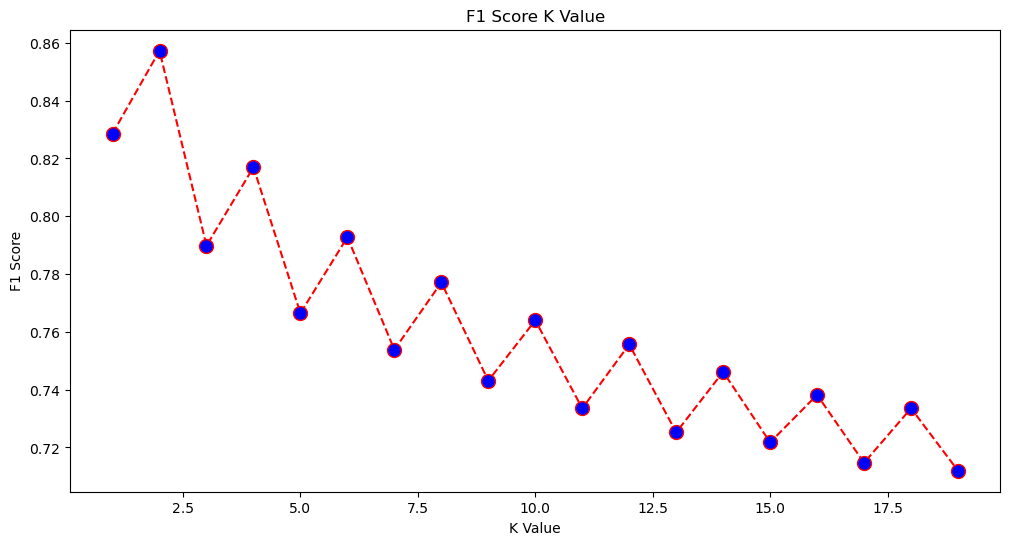

In [306]:
# PLOT

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

El mejor F1-score es cuando k = 2..vamos a entrenar de nuevo nuestro modelo con K = 2

In [307]:
clf2 = KNeighborsClassifier(n_neighbors=2)
clf2.fit(X_train_scaled, y_train_smote)
y_pred2 = clf2.predict(X_test_scaled)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5700
           1       0.44      0.67      0.53       867

    accuracy                           0.84      6567
   macro avg       0.69      0.77      0.72      6567
weighted avg       0.88      0.84      0.86      6567



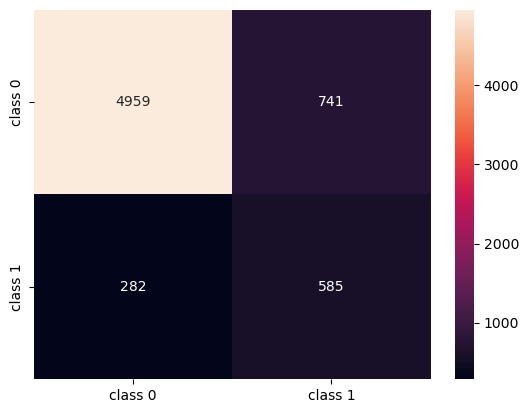

In [308]:
# Adding classes names for better interpretation
classes_names = ['class 0','class 1']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred2), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');



Esta vez, con "k" optimizado , ajusta mejor para Class1 ( f1-score : 0.53) y mejora ligeramente el ajuste para Class0 (0.88 a 0.91). De todas formas, nuestro objetivo es " capturar" las características del Grupo 1 - No sé hasta que punto las mínimas mejores en accuracy alterarán la "composición"

In [309]:
# Comparamos Scores : 
    
print (classification_report(y_test, y_pred_knn))
print (classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5700
           1       0.38      0.76      0.51       867

    accuracy                           0.80      6567
   macro avg       0.67      0.78      0.69      6567
weighted avg       0.88      0.80      0.83      6567

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5700
           1       0.44      0.67      0.53       867

    accuracy                           0.84      6567
   macro avg       0.69      0.77      0.72      6567
weighted avg       0.88      0.84      0.86      6567



Pasamos a realizar el cross validation de nuestro modelo.

In [310]:
# Realizamos validación cruzada
cv_scores_knn = cross_val_score(best_model_knn, X_train_smote, y_train_smote, cv=5, scoring='accuracy')



print("Precisión para cada fold:", cv_scores_knn)
print("Precisión media:", cv_scores_knn.mean())
print("Desviación estándar :", cv_scores_knn.std())

Precisión para cada fold: [0.88353148 0.90202554 0.89817261 0.89728063 0.90058351]
Precisión media: 0.8963187552651212
Desviación estándar : 0.006612591008237117


Cross Validation valida el rendimiento de nuestro modelo.

# Parte 2

Aplicamos las predicciones a un segundo dataset.(https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks)

Queremos detectar canciones que deberían estar en Class1 ( TOP ) y que sin embargo no son populares ( track_popularity < 70 ) 

In [311]:
data3 =  pd.read_csv('spotify_data.csv')
df1 = pd.DataFrame(data3)
df1.shape

(1159764, 20)

In [312]:
df1.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [313]:
# Drop Duplicates


df1['track_id'] = df1['track_id'].astype('category')
df1.drop_duplicates(subset=['track_id']). reset_index(drop = True)
df1.shape 

(1159764, 20)

No existen duplicados, por lo menos en cuanto a 'track_id', quizás si mirasemos por Track_name/ Artist encontraríamos.

In [314]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Unnamed: 0        1159764 non-null  int64   
 1   artist_name       1159764 non-null  object  
 2   track_name        1159764 non-null  object  
 3   track_id          1159764 non-null  category
 4   popularity        1159764 non-null  int64   
 5   year              1159764 non-null  int64   
 6   genre             1159764 non-null  object  
 7   danceability      1159764 non-null  float64 
 8   energy            1159764 non-null  float64 
 9   key               1159764 non-null  int64   
 10  loudness          1159764 non-null  float64 
 11  mode              1159764 non-null  int64   
 12  speechiness       1159764 non-null  float64 
 13  acousticness      1159764 non-null  float64 
 14  instrumentalness  1159764 non-null  float64 
 15  liveness          1159764 non-nu

Tampoco existen Null_values() en este Dataset de 1 M. de canciones

Aplicamos Drops, etc para que los 2 DF tengan el mismo formato

In [315]:
df1 = df1.drop(df1.columns[[0,1,2,3,5,6,8,18,19]], axis= 1 ) # drop de las mismas columnas para que tengan el mismo formato

In [316]:
df1.head()

,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,68,0.483,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406
1,50,0.572,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182
2,57,0.409,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832
3,58,0.392,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961
4,54,0.430,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864


Y añadiremos una columna de nuevo con las Class 0 y 1 (> 70 track_popularity) para comparar con predicted_popularity

In [317]:
df1['control'] = df1['popularity'].apply(lambda x: 1 if x > 70 else  0)
df1

,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,control
0,68,0.483,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,0
1,50,0.572,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,0
2,57,0.409,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,0
3,58,0.392,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,0
4,54,0.430,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,4,0.373,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,0
1159760,3,0.516,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,0
1159761,2,0.491,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,0
1159762,0,0.480,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,0


Aplicaremos Robust Scaler a todo el dataframe (df1). El escalado debe ser el mismo, en caso contrario los resultados de aplicar el modelo se distorsionarían.

In [318]:
# Inicializar el RobustScaler
scaler = RobustScaler()

# Ajustar y transformar todos los datos
df1_scaled = scaler.fit_transform(df1)

# Crear un nuevo DataFrame con los datos escalados
df1_scaled = pd.DataFrame(df1_scaled, columns= df1.columns)

# Mostrar el DataFrame escalado
df1_scaled.head()

,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,control
0,2.208333,-0.253788,-0.166667,-0.469656,0.0,-0.150289,0.863321,-0.002866,-0.097888,-0.667411,0.279156,0.0
1,1.458333,0.083333,-0.333333,-0.510715,0.0,-0.479769,0.520833,-0.002844,-0.188563,0.171875,0.443998,0.0
2,1.750000,-0.534091,-0.333333,-1.127499,0.0,-0.354528,0.301452,-0.002785,-0.229263,-0.654018,0.435484,0.0
3,1.791667,-0.598485,0.833333,-0.431298,0.0,-0.277457,1.041667,-0.002866,-0.279753,0.156250,2.019900,0.0
4,1.625000,-0.454545,0.166667,0.365748,-1.0,-0.394990,-0.117424,0.028567,-0.123648,-0.493304,1.214738,0.0


In [319]:
# guardamos control por si hacemos drop
control2 = df1_scaled['control']


df1_scaled = df1_scaled.drop(df1_scaled.columns[[0,11]], axis = 1) # drop de popularity  en df1_scaled para evitar sesgos/ colinealidad una vez tenemos la variable control
df1_scaled.round(decimals = 2)

,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.25,-0.17,-0.47,0.0,-0.15,0.86,-0.00,-0.10,-0.67,0.28
1,0.08,-0.33,-0.51,0.0,-0.48,0.52,-0.00,-0.19,0.17,0.44
2,-0.53,-0.33,-1.13,0.0,-0.35,0.30,-0.00,-0.23,-0.65,0.44
3,-0.60,0.83,-0.43,0.0,-0.28,1.04,-0.00,-0.28,0.16,2.02
4,-0.45,0.17,0.37,-1.0,-0.39,-0.12,0.03,-0.12,-0.49,1.21
...,...,...,...,...,...,...,...,...,...,...
1159759,-0.67,0.83,0.18,-1.0,0.44,0.28,-0.00,0.13,0.19,-0.34
1159760,-0.13,0.33,-0.02,-1.0,-0.35,1.01,-0.00,-0.02,-0.39,-0.05
1159761,-0.22,0.00,-0.19,0.0,-0.45,0.52,0.00,-0.21,-0.90,-0.53
1159762,-0.27,-0.83,-1.06,0.0,-0.45,0.45,-0.00,-0.05,-0.53,0.29


Reordenamos las columnas de este 2º Dataframe según el orden del primer DataFrame para no confundir al algoritmo. Mismo formato pues...

In [320]:
#df1_scaled = df1_scaled.reindex(columns=df1.scaled.iloc[])



Ahora aplicamos nuestro mejor modelo obtenido con KNN ( best_model_knn ) al conjunto de datos:

In [321]:
# Realizamos predicciones en este segundo conjunto de datos
predicted_popularity = best_model_knn.predict(df1_scaled)

In [322]:
predicted_popularity

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Una vez obtenidas las previsiones de Class ( Class 0 y Class 1 ), los adjuntamos en una nueva columna, que creamos en nuestro dataframe 'df1'. 

In [323]:
df1['predicted_popularity'] = predicted_popularity

Ahora podemos comparar predicted_popularity ( segun KNN y features sónicas ) y track_popularity (control) para ver hasta que punto nuestro modelo ajustó correctamente.

In [337]:
# Buscamos las "perlas", canciones que por características ( segun algoritmo de class por features sónicas) deberían ser populares ( predicted_popularity = 1) y que sin embargo no alcanzaron popularidad ( control = 0) 

df_pearl = df1.query('control == 0 & predicted_popularity == 1 & popularity < 60')

In [338]:
# y comparamos que características distingun a las "perlas" de las canciones que sí fueron populares,

df_pearl.describe()

,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,control,predicted_popularity
count,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.000000,264784.0,264784.0
mean,19.623301,0.550102,5.080133,-7.661442,0.604651,0.071420,0.314319,0.059549,0.207847,0.500782,124.000362,0.0,1.0
std,15.662321,0.165224,3.537704,4.551106,0.488926,0.059327,0.327627,0.172235,0.165987,0.243944,30.707766,0.0,0.0
min,0.000000,0.000000,0.000000,-53.291000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,6.000000,0.440000,2.000000,-9.065000,0.000000,0.036600,0.013600,0.000000,0.102000,0.310000,99.978000,0.0,1.0
50%,17.000000,0.557000,5.000000,-6.615000,1.000000,0.050300,0.183000,0.000038,0.144000,0.496000,122.207500,0.0,1.0
75%,31.000000,0.671000,8.000000,-4.933000,1.000000,0.080600,0.587000,0.007860,0.274000,0.693000,143.998000,0.0,1.0
max,59.000000,0.993000,11.000000,3.981000,1.000000,0.468000,0.996000,1.000000,1.000000,1.000000,248.019000,0.0,1.0


In [339]:
df_Canciones_top.describe()

,track_popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,control
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.0
mean,78.385850,0.675063,5.351718,-6.081101,0.578436,0.107387,0.194519,0.014406,0.174668,0.530610,120.606469,1.0
std,6.221191,0.142359,3.649731,2.528376,0.493865,0.098468,0.215022,0.080648,0.135324,0.221675,28.313152,0.0
min,71.000000,0.080000,0.000000,-28.310000,0.000000,0.020000,0.000000,0.000000,0.020000,0.000000,48.720000,1.0
25%,74.000000,0.580000,2.000000,-7.180000,0.000000,0.040000,0.030000,0.000000,0.090000,0.360000,97.950000,1.0
50%,77.000000,0.690000,6.000000,-5.720000,1.000000,0.060000,0.110000,0.000000,0.120000,0.530000,118.030000,1.0
75%,82.000000,0.780000,9.000000,-4.347500,1.000000,0.130000,0.290000,0.000000,0.210000,0.700000,136.970000,1.0
max,100.000000,0.980000,11.000000,0.300000,1.000000,0.860000,0.980000,0.920000,0.970000,0.980000,207.970000,1.0
